In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Part 1: Data Analysis and Preprocessing

In [4]:
# Task 1: Load and Inspect the Data
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ML Assignment 24/ecommerce_data.csv')  # replace with actual path to your CSV file
print("Dataset Preview:")
print(data.head())  # Display the first few rows for initial inspection

Dataset Preview:
   CustomerID   Timestamp  ProductID  Category       Price  Quantity  \
0        1052  2023-01-01          2  Clothing  125.570224         2   
1        1093  2023-01-02         15  Clothing  191.996781         3   
2        1015  2023-01-03          8  Clothing   40.645691         1   
3        1072  2023-01-04          8       NaN         NaN         2   
4        1061  2023-01-05         17       NaN         NaN         5   

        Action  
0  Add to Cart  
1  Add to Cart  
2  Add to Cart  
3         View  
4     Purchase  


In [5]:
# Task 2: Handle Missing Values
# Drop rows with missing 'CustomerID' as this ID is crucial for analysis
data = data.dropna(subset=['CustomerID'])
# Fill missing 'Price' and 'Quantity' with median values
data['Price'] = data['Price'].fillna(data['Price'].median())
data['Quantity'] = data['Quantity'].fillna(data['Quantity'].median())

In [6]:
data

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,NaN,266.021046,2,View
4,1061,2023-01-05,17,NaN,266.021046,5,Purchase
...,...,...,...,...,...,...,...
995,1010,2025-09-22,15,Books,284.444932,2,Add to Cart
996,1067,2025-09-23,2,Clothing,392.558608,5,Add to Cart
997,1018,2025-09-24,1,Home,357.159952,1,Add to Cart
998,1100,2025-09-25,11,Electronics,94.323722,3,Purchase


from matplotlib import pyplot as plt
data['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['ProductID'].plot(kind='hist', bins=20, title='ProductID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Action').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='CustomerID', y='ProductID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='ProductID', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Price', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['CustomerID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('CustomerID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['CustomerID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Action')):
  _plot_series(series, series_name, i)
  fig.legend(title='Action', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('CustomerID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['ProductID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('ProductID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['ProductID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Action')):
  _plot_series(series, series_name, i)
  fig.legend(title='Action', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('ProductID')

from matplotlib import pyplot as plt
data['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['ProductID'].plot(kind='line', figsize=(8, 4), title='ProductID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Action'].value_counts()
    for x_label, grp in data.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Action')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='CustomerID', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Action'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='CustomerID', y='Action', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='ProductID', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Action'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='ProductID', y='Action', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
#Task 3: Calculate total actions per customer
customer_actions = data.groupby('CustomerID')['Action'].count().reset_index(name='TotalActions')
data = data.merge(customer_actions, on='CustomerID', how='left')

In [8]:
data

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action,TotalActions
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart,12
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart,11
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart,10
3,1072,2023-01-04,8,NaN,266.021046,2,View,8
4,1061,2023-01-05,17,NaN,266.021046,5,Purchase,12
...,...,...,...,...,...,...,...,...
995,1010,2025-09-22,15,Books,284.444932,2,Add to Cart,6
996,1067,2025-09-23,2,Clothing,392.558608,5,Add to Cart,10
997,1018,2025-09-24,1,Home,357.159952,1,Add to Cart,9
998,1100,2025-09-25,11,Electronics,94.323722,3,Purchase,9


### Part 2: Feature Engineering and Analysis

In [9]:
# Task 1: Create a new feature 'TotalSpent' (Price * Quantity)
data['TotalSpent'] = data['Price'] * data['Quantity']

In [10]:
data

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action,TotalActions,TotalSpent
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart,12,251.140447
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart,11,575.990343
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart,10,40.645691
3,1072,2023-01-04,8,NaN,266.021046,2,View,8,532.042092
4,1061,2023-01-05,17,NaN,266.021046,5,Purchase,12,1330.105231
...,...,...,...,...,...,...,...,...,...
995,1010,2025-09-22,15,Books,284.444932,2,Add to Cart,6,568.889863
996,1067,2025-09-23,2,Clothing,392.558608,5,Add to Cart,10,1962.793040
997,1018,2025-09-24,1,Home,357.159952,1,Add to Cart,9,357.159952
998,1100,2025-09-25,11,Electronics,94.323722,3,Purchase,9,282.971167


In [11]:
# Task 2: Analyze Most Popular Categories
# Group data by 'Category' and count actions
category_counts = data['Category'].value_counts()

<ipython-input-12-2ed31318c97c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


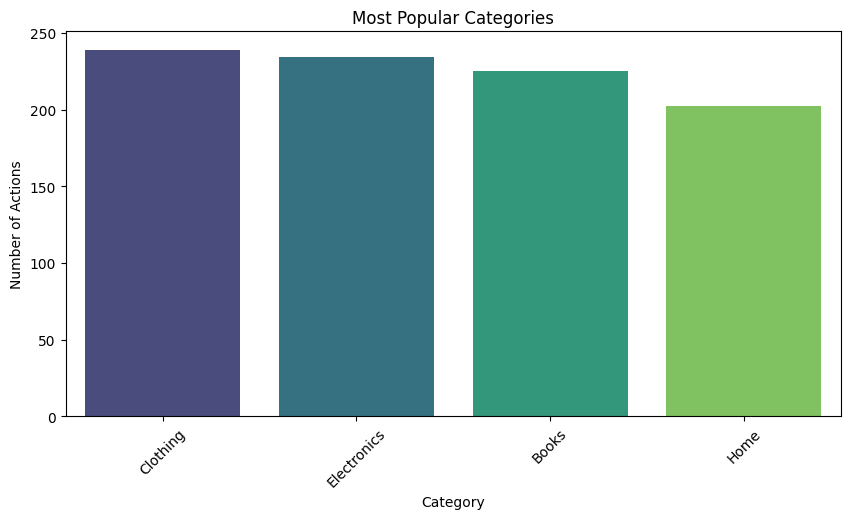

In [12]:
# Plot most popular categories
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Most Popular Categories")
plt.xlabel("Category")
plt.ylabel("Number of Actions")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Task 3: Calculate Average Price per Category
# Group data by 'Category' and calculate the average price
avg_price_by_category = data.groupby('Category')['Price'].mean().sort_values(ascending=False)

<ipython-input-14-ebcfb9fb7692>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette="magma")


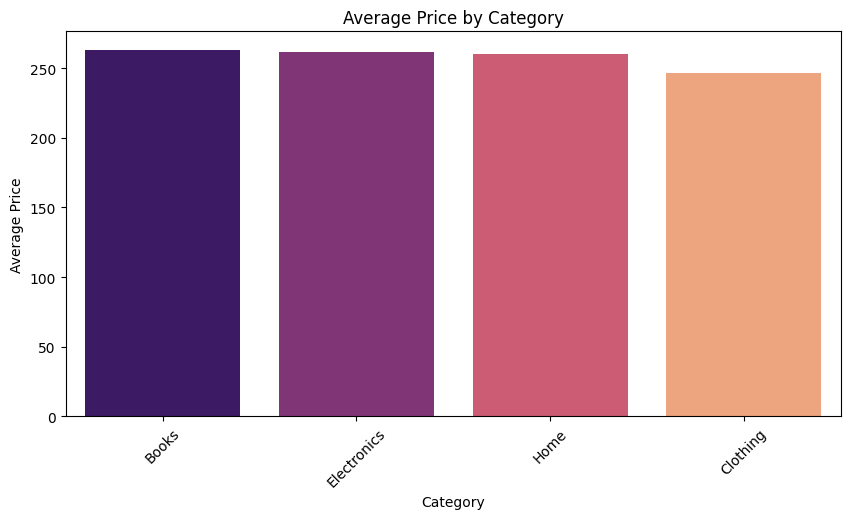

In [14]:
# Plot average price per category
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette="magma")
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

###Part 3: Machine Learning Preprocessing

In [15]:
# Task 1: Prepare Data for Machine Learning
# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Category', 'Action'], drop_first=True)

In [16]:
data

,CustomerID,Timestamp,ProductID,Price,Quantity,TotalActions,TotalSpent,Category_Clothing,Category_Electronics,Category_Home,Action_Purchase,Action_View
0,1052,2023-01-01,2,125.570224,2,12,251.140447,True,False,False,False,False
1,1093,2023-01-02,15,191.996781,3,11,575.990343,True,False,False,False,False
2,1015,2023-01-03,8,40.645691,1,10,40.645691,True,False,False,False,False
3,1072,2023-01-04,8,266.021046,2,8,532.042092,False,False,False,False,True
4,1061,2023-01-05,17,266.021046,5,12,1330.105231,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2025-09-22,15,284.444932,2,6,568.889863,False,False,False,False,False
996,1067,2025-09-23,2,392.558608,5,10,1962.793040,True,False,False,False,False
997,1018,2025-09-24,1,357.159952,1,9,357.159952,False,False,True,False,False
998,1100,2025-09-25,11,94.323722,3,9,282.971167,False,True,False,True,False


In [21]:
# Task 2: Standardize the numerical features 'Price', 'Quantity', 'TotalSpent'
scaler = StandardScaler()
data[['Price', 'Quantity', 'TotalSpent']] = scaler.fit_transform(data[['Price', 'Quantity', 'TotalSpent']])

In [22]:
# Define features and target
# Assuming 'Action_Purchase' is our target to predict purchases
X = data.drop(['Action_Purchase', 'CustomerID', 'Timestamp', 'ProductID'], axis=1)
y = data['Action_Purchase']

In [23]:
# Task 3: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Task: Train and Evaluate Logistic Regression Model
# Initialize and train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Task 8: Evaluate Model Performance
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.00%


In [27]:
# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.83      0.79       102
        True       0.80      0.70      0.75        98

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



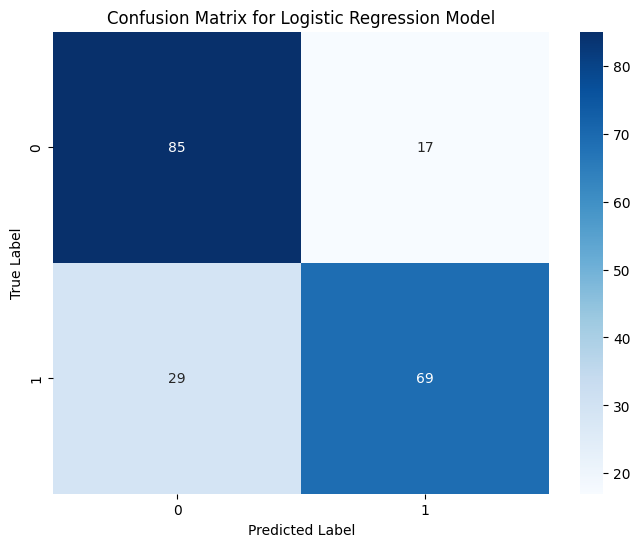

In [28]:
# Task : Confusion Matrix
# Generate confusion matrix and plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Part 4: Insights and Data Preparation Summary

In [29]:
# Task : Insights Summary
print("\nData Preparation Summary:")
print("- Missing values were handled with targeted strategies.")
print("- Features 'TotalActions' and 'TotalSpent' were created to capture customer interaction and spending.")
print("- One-hot encoding was applied for categorical features; numerical features were standardized.")
print("- Logistic Regression was used for classification to predict customer purchase behavior.")
print("\nInsights:")
print("- Most popular categories and average price by category provide insights into customer preferences.")
print("- Confusion matrix and accuracy report help evaluate model performance on purchase prediction.")


Data Preparation Summary:
- Missing values were handled with targeted strategies.
- Features 'TotalActions' and 'TotalSpent' were created to capture customer interaction and spending.
- One-hot encoding was applied for categorical features; numerical features were standardized.
- Logistic Regression was used for classification to predict customer purchase behavior.

Insights:
- Most popular categories and average price by category provide insights into customer preferences.
- Confusion matrix and accuracy report help evaluate model performance on purchase prediction.


###Part 4: Insights and Data Preparation Summary

**Summary of Data Analysis, Feature Engineering, and Preprocessing:**

Data Analysis: We inspected the dataset, handled missing values by removing essential missing CustomerID rows, and filling gaps in other columns with median values.

Feature Engineering: We created TotalActions to capture the number of interactions per customer and TotalSpent to show each customer’s total spending.

Preprocessing: We used one-hot encoding for categorical features like Category and Action, and standardized numerical features (Price, Quantity, TotalSpent) to ensure balanced input for the model.


**Trends or Patterns Observed:**

Popular categories showed significant customer engagement, and categories with higher average prices saw fewer interactions.
High spending was often correlated with a higher count of customer interactions, suggesting loyalty or frequent purchasing patterns.


**Rationale for Feature Engineering and Preprocessing:**

Creating TotalActions and TotalSpent allowed us to quantify customer engagement and spending, key indicators of purchasing behavior.
One-hot encoding was necessary for the categorical Category and Action features to prepare them for machine learning, and standardizing numerical features ensured uniform model inputs, which can improve Logistic Regression performance.

##LogisticRegression

**Approach to handling missing data and preprocessing techniques:**

**Handling Missing Data: **Logistic Regression requires complete data to perform
optimally, so we used mean imputation for numerical data and mode imputation for categorical features, ensuring consistent data without missing values.

**Preprocessing Techniques: **

*  Scaling Features: Applied StandardScaler() to bring numerical features to a common scale, which is critical as Logistic Regression assumes normally distributed data.
*  Encoding Categorical Data: OneHotEncoder() was used for categorical variables to avoid imposing ordinality, allowing the model to treat each category independently.



**Preprocessing steps contribute to preparing the data for machine learning:**

Contribution to Model Preparation: Preprocessing made the data compatible with Logistic Regression’s assumptions, leading to improved performance and a well-fitted model that leverages the entire dataset effectively